In [2]:
pip install yfinance

In [7]:
import yfinance as yf, numpy as np,datetime as dt,matplotlib.pyplot as plt
from scipy.stats import norm

In [14]:
tickers=['INFY','TCS','HDFCBANK.NS','COALINDIA.NS','RELIANCE.NS','SUNPHARMA.NS']
weights=np.array([0.1,0.1,0.1,0.1,0.1,0.1])

In [15]:
start=dt.datetime(2019,1,1)
end=dt.datetime.now()

df=yf.download(tickers,start,end)['Adj Close']
df

[*********************100%***********************]  6 of 6 completed


,COALINDIA.NS,HDFCBANK.NS,INFY,RELIANCE.NS,SUNPHARMA.NS,TCS
Date,,,,,,
2018-12-31,NaN,NaN,8.830184,NaN,NaN,4.458913
2019-01-01,175.664490,1060.455688,NaN,1096.698975,418.735474,NaN
2019-01-02,172.173004,1050.779663,8.913662,1082.415405,425.013397,4.627174
2019-01-03,170.936462,1042.535400,8.783807,1069.061401,421.198364,4.608478
2019-01-04,172.027527,1045.324707,8.932215,1074.833496,418.976929,4.786087
...,...,...,...,...,...,...
2022-03-30,182.899994,1476.949951,24.969999,2672.949951,920.599976,8.180000
2022-03-31,183.050003,1470.349976,24.889999,2634.750000,914.750000,8.170000
2022-04-01,186.149994,1506.000000,24.610001,2655.850098,908.700012,8.120000


In [17]:
returns=df.pct_change()
returns

,COALINDIA.NS,HDFCBANK.NS,INFY,RELIANCE.NS,SUNPHARMA.NS,TCS
Date,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,0.000000,NaN,NaN,0.000000
2019-01-02,-0.019876,-0.009124,0.009454,-0.013024,0.014993,0.037736
2019-01-03,-0.007182,-0.007846,-0.014568,-0.012337,-0.008976,-0.004040
2019-01-04,0.006383,0.002676,0.016896,0.005399,-0.005274,0.038540
...,...,...,...,...,...,...
2022-03-30,-0.016667,0.017323,-0.005576,0.019218,0.001360,-0.056517
2022-03-31,0.000820,-0.004469,-0.003204,-0.014291,-0.006355,-0.001223
2022-04-01,0.016935,0.024246,-0.011249,0.008008,-0.006614,-0.006120


In [18]:
cov_matrix=returns.cov()
cov_matrix

,COALINDIA.NS,HDFCBANK.NS,INFY,RELIANCE.NS,SUNPHARMA.NS,TCS
COALINDIA.NS,0.000441,0.000094,0.000055,0.000133,0.000111,0.000014
HDFCBANK.NS,0.000094,0.000346,0.000084,0.000175,0.000091,0.000143
INFY,0.000055,0.000084,0.000402,0.000092,0.000080,0.000249
RELIANCE.NS,0.000133,0.000175,0.000092,0.000443,0.000129,0.000074
SUNPHARMA.NS,0.000111,0.000091,0.000080,0.000129,0.000390,0.000066
TCS,0.000014,0.000143,0.000249,0.000074,0.000066,0.002336


In [19]:
avg_returns=returns.mean()
avg_returns

COALINDIA.NS    0.000295
HDFCBANK.NS     0.000674
INFY            0.001420
RELIANCE.NS     0.001258
SUNPHARMA.NS    0.001140
TCS             0.001910
dtype: float64

In [20]:
count=returns.count()[0]
count

845

In [21]:
port_mean=avg_returns@weights
port_std=np.sqrt(weights.T@cov_matrix@weights)

In [22]:
port_mean

0.0006696494316471527

In [23]:
port_std

0.008681590329280897

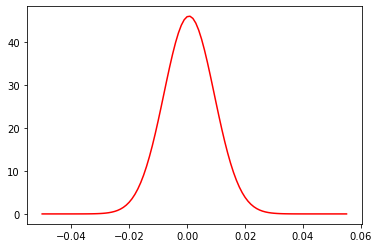

In [24]:
x=np.arange(-0.05,0.055,0.001)
norm_dist=norm.pdf(x,port_mean,port_std)

plt.plot(x,norm_dist,color='r')
plt.show()


In [25]:
confidence_level=0.05

VaR=norm.ppf(confidence_level,port_mean,port_std)
VaR

-0.013610295909177362

In [26]:
num_days=5

VaR*np.sqrt(num_days)

-0.030433546846807887